In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from classes.transformations import *

# Load csv file to dataframe for analysis

In [108]:
df = pd.read_csv('./storage/in/Space_Corrected.csv')

# Return top 5 rows of dataframe


In [109]:
df.head()

,Company_Name,Location,Datum,Detail,Status_Rocket,Rocket,Status_Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success


# Return common statistics around our data

In [93]:
df.describe()

,Company_Name,Location,Datum,Detail,Status_Rocket,Rocket,Status_Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450,Success
freq,1777,235,2,6,3534,136,3879


# Return the structure of our dataframe

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company_Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status_Rocket   4324 non-null   object
 5   Rocket          964 non-null    object
 6   Status_Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


# Lets check how many rows are missing data

In [110]:
df.isnull().sum()

Company_Name         0
Location             0
Datum                0
Detail               0
Status_Rocket        0
Rocket            3360
Status_Mission       0
dtype: int64

In [112]:
df_null = df[df['Rocket'].isnull()]

In [115]:
df_null.count()

Company_Name      3360
Location          3360
Datum             3360
Detail            3360
Status_Rocket     3360
Rocket               0
Status_Mission    3360
dtype: int64

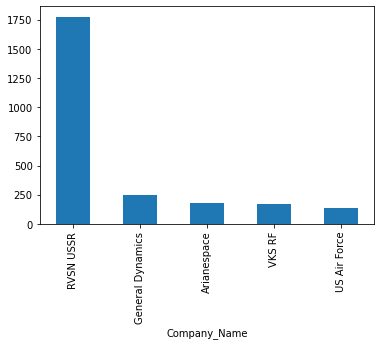

In [113]:
df_null.groupby("Company_Name").size().sort_values(ascending=False).head(5).plot(kind='bar')
plt.show()

# Drop records that are missing records

In [116]:
df = df.dropna()

In [37]:
df[['Site','City', 'State', 'Country']] = df.Location.str.split(",", expand=True)

In [38]:
df.Country.fillna(df.State, inplace=True)

In [39]:
df.loc[df["Country"] != ' USA', "State"] = np.nan

In [ ]:
df['Status_Rocket'] = df['Status_Rocket'].replace(['StatusActive', 'StatusRetired'],['Active', 'Retired'])

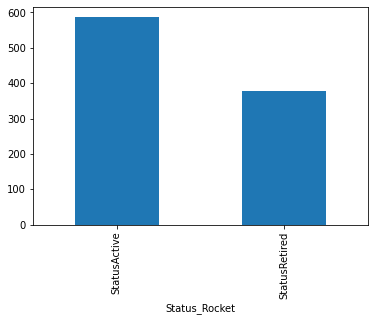

In [118]:
df.groupby("Status_Rocket").size().sort_values(ascending=False).head(5).plot(kind='bar')
plt.show()

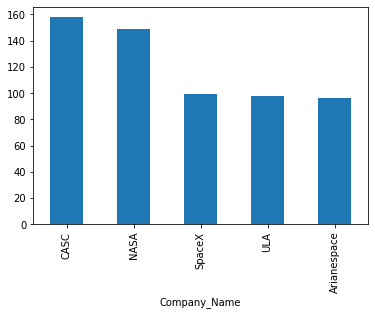

In [117]:
df.groupby("Company_Name").size().sort_values(ascending=False).head(5).plot(kind='bar')
plt.show()